In [1]:
import win32com.client
import time
import threading
import matplotlib.pyplot as plt
import numpy as np
from ctypes  import *
import array
import timeit

In [2]:
#connect to PrairieView
pl = win32com.client.Dispatch("PrairieLink.Application")

pl.Connect()
#print a message if successfully connected
if(pl.Connected()):
    print("Connected via PrairieLink")

# print(pl.GetMotorPosition("Z"))

# pl.MoveMotor("Z" 10) 

# print(pl.GetMotorPosition("Z"))

Connected via PrairieLink


In [3]:
# pl.MoveMotor("'Z' '20'") 
no = 10
pl.SendScriptCommands(f"-SetMotorPosition 'X' '{no}'")
time.sleep(0.033)

In [3]:
# making save path
imaging_dir = str('E:/Kaitlyn/automation_testing/')
print('save path')
# pl.SendScriptCommands("-SetSavePath E:/Trash")
# begin a live scan
pl.SendScriptCommands('-lv')

save path


In [ ]:
 #stop the scan
pl.SendScriptCommands('-stop')

True

In [135]:
pl.SamplesPerPixel()

3

In [146]:
pl.Disconnect()

In [125]:
num_samples

1572864

In [126]:
num_samples

1572864

In [142]:
currentData = np.array(currentData)

In [144]:
np.shape(currentData)

(4194304,)

In [143]:
temp = np.average(np.reshape(currentData, (-1, 3)), axis = 1)

ValueError: cannot reshape array of size 4194304 into shape (3)

In [26]:
4194304/16

262144.0

In [27]:
262144/512

512.0

In [138]:
asdf = np.array(currentData).reshape((512,512,-1))

In [139]:
np.shape(asdf)

(512, 512, 16)

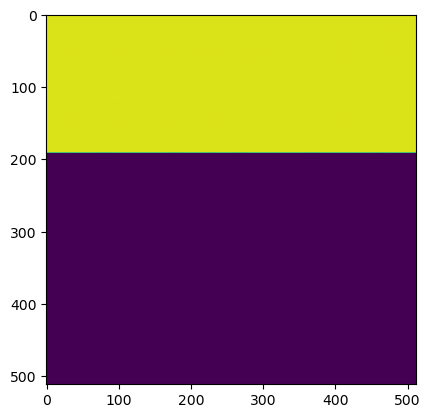

In [140]:
plt.imshow(asdf.mean(axis=2))

In [37]:
newasdf = np.zeros((512,512,16))

In [38]:
for item, n in enumerate(currentData):
    newasdf[n//512,n%512,n//262144] = item

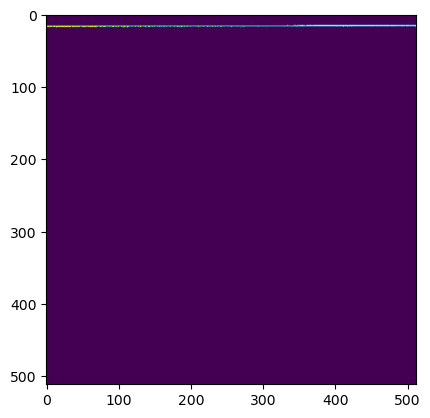

In [53]:
plt.imshow(newasdf[:,:,0])

In [5]:
asdf = [1,3,5,4,3,4,7,3,5,6,3]
qwerty = [2,4,6]
aa = list(zip(asdf,qwerty))
aa

[(1, 2), (3, 4), (5, 6)]

In [8]:
asdf[2:-1:-1]

[]

In [48]:
meme = (c_int16 * 786432)()

In [16]:
meme[:]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [49]:
ok = [0] * 786432

In [50]:
zz = np.zeros((786432,), np.int16)

In [51]:
qq = array.array('i', [0]*786432)

In [52]:
t1 = time.time()
for i in range(5000):
    meme[i] = i
    ab = meme[:]
print("Using ctypes", time.time() - t1)

t2 = time.time()
for i in range(5000):
    zz[i] = i
    ab = zz[:]
print("Using numpy", time.time() - t2)
    
t3 = time.time()
for i in range(5000):
    ok[i] = i
    ab = ok[:]
print("Using native list", time.time() - t3)

t4 = time.time()
for i in range(5000):
    qq[i] = i
    ab = qq[i]
print("Using array wrapper", time.time()-t4)

Using ctypes 27.44812560081482
Using numpy 0.0
Using native list 10.640584707260132
Using array wrapper 0.0


In [40]:
id(zz)

3059961441104

In [41]:
myThing = (c_int16 * 1000).from_address(3059961441104

)

In [42]:
myThing[:]

[1,
 0,
 0,
 0,
 -3456,
 -7633,
 32760,
 0,
 -28608,
 29242,
 712,
 0,
 1,
 0,
 0,
 0,
 11552,
 28505,
 712,
 0,
 11560,
 28505,
 712,
 0,
 0,
 0,
 0,
 0,
 5664,
 -7632,
 32760,
 0,
 1287,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 21760,
 28710,
 712,
 0,
 1,
 0,
 0,
 0,
 -18048,
 -6972,
 32760,
 0,
 40,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -284,
 27332,
 712,
 0,
 0,
 0,
 0,
 0,
 29296,
 28265,
 10356,
 21794,
 26995,
 26478,
 25376,
 31092,
 25968,
 8819,
 8236,
 26996,
 25965,
 29742,
 28009,
 10341,
 8233,
 8237,
 12660,
 2601,
 29696,
 10547,
 10,
 0,
 1,
 0,
 0,
 0,
 -18048,
 -6972,
 32760,
 0,
 39,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 228,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29296,
 28265,
 10356,
 21794,
 26995,
 26478,
 28192,
 28021,
 31088,
 11298,
 29728,
 28009,
 11877,
 26996,
 25965,
 10536,
 11552,
 29728,
 10546,
 10,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 -18048,
 -6972,
 32760,
 0,
 45,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 228,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29296,
 28265,
 10356,
 21794,
 

In [53]:
qq.buffer_info()

(3059965136960, 786432)

In [62]:
myThing = (c_int16 * 1000).from_address(3060103307328)


In [63]:
myThing[:]

[0,
 0,
 1,
 0,
 2,
 0,
 3,
 0,
 4,
 0,
 5,
 0,
 6,
 0,
 7,
 0,
 8,
 0,
 9,
 0,
 10,
 0,
 11,
 0,
 12,
 0,
 13,
 0,
 14,
 0,
 15,
 0,
 16,
 0,
 17,
 0,
 18,
 0,
 19,
 0,
 20,
 0,
 21,
 0,
 22,
 0,
 23,
 0,
 24,
 0,
 25,
 0,
 26,
 0,
 27,
 0,
 28,
 0,
 29,
 0,
 30,
 0,
 31,
 0,
 32,
 0,
 33,
 0,
 34,
 0,
 35,
 0,
 36,
 0,
 37,
 0,
 38,
 0,
 39,
 0,
 40,
 0,
 41,
 0,
 42,
 0,
 43,
 0,
 44,
 0,
 45,
 0,
 46,
 0,
 47,
 0,
 48,
 0,
 49,
 0,
 50,
 0,
 51,
 0,
 52,
 0,
 53,
 0,
 54,
 0,
 55,
 0,
 56,
 0,
 57,
 0,
 58,
 0,
 59,
 0,
 60,
 0,
 61,
 0,
 62,
 0,
 63,
 0,
 64,
 0,
 65,
 0,
 66,
 0,
 67,
 0,
 68,
 0,
 69,
 0,
 70,
 0,
 71,
 0,
 72,
 0,
 73,
 0,
 74,
 0,
 75,
 0,
 76,
 0,
 77,
 0,
 78,
 0,
 79,
 0,
 80,
 0,
 81,
 0,
 82,
 0,
 83,
 0,
 84,
 0,
 85,
 0,
 86,
 0,
 87,
 0,
 88,
 0,
 89,
 0,
 90,
 0,
 91,
 0,
 92,
 0,
 93,
 0,
 94,
 0,
 95,
 0,
 96,
 0,
 97,
 0,
 98,
 0,
 99,
 0,
 100,
 0,
 101,
 0,
 102,
 0,
 103,
 0,
 104,
 0,
 105,
 0,
 106,
 0,
 107,
 0,
 108,
 0,
 109,
 0,
 110,
 0,


In [66]:
aa = array.array('i', )

TypeError: unsupported operand type(s) for -: 'type' and 'int'

In [61]:
aa.buffer_info()

(3060103307328, 3145728)

In [67]:
aa = [1,2,3]

In [68]:
aa/3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [3]:
thing = pl.registerevent()

AttributeError: PrairieLink.Application.registerevent

In [29]:
pl.Disconnect()

In [27]:
laser_name = 'Monaco 1035'
laser_power = 1#182
iterations = 5
pulse_duration = 40
spiral_size = 5.8
revolutions = 20
reps = 40
rep_delay = 20
delay = 5000
spiralSizePixels = 0.01

xP,yP = 0.5,0.5

In [34]:
start = time.time()
pl.SendScriptCommands("-MarkPoints {} {} {} 'Monaco 1035' {} {} {} {}".format(xP, yP, pulse_duration, laser_power, 'True', spiralSizePixels, revolutions))
pl.SendScriptCommands("-MarkPoints {} {} {} 'Monaco 1035' {} {} {} {}".format(xP, yP, pulse_duration, laser_power, 'True', spiralSizePixels, revolutions))

print(time.time()-start)

1.9954068660736084


In [16]:
 %timeit for x in range(1): pl.SendScriptCommands("-MarkPoints {} {} {} 'Monaco 1035' {} {} {} {}".format(xP, yP, pulse_duration, laser_power, 'True', spiralSizePixels, revolutions))


The slowest run took 16.38 times longer than the fastest. This could mean that an intermediate result is being cached.
394 ms ± 479 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
